<a href="https://colab.research.google.com/github/BrahianCarrera/Speaker-Recognition/blob/main/Speaker%20Recognition%202%20-%20Clean%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descripción del problema


# Caracterización

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Carga del dataset
url = 'https://raw.githubusercontent.com/BrahianCarrera/Speaker-Recognition/main/dataset/accent-mfcc-data-1.csv'
df = pd.read_csv(url)

In [ ]:
# Mostrar las primeras filas
df.head()

,language,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [ ]:
df.language.unique()

array(['ES', 'FR', 'GE', 'IT', 'UK', 'US'], dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   language  329 non-null    object 
 1   X1        329 non-null    float64
 2   X2        329 non-null    float64
 3   X3        329 non-null    float64
 4   X4        329 non-null    float64
 5   X5        329 non-null    float64
 6   X6        329 non-null    float64
 7   X7        329 non-null    float64
 8   X8        329 non-null    float64
 9   X9        329 non-null    float64
 10  X10       329 non-null    float64
 11  X11       329 non-null    float64
 12  X12       329 non-null    float64
dtypes: float64(12), object(1)
memory usage: 33.5+ KB


In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,5.645227,-4.270814,2.635319,7.200207,-5.648733,9.810236,-9.408053,5.117328,-1.229432,-2.362288,2.430833,-3.980415
std,5.105302,3.514350,3.635323,4.310095,4.596180,3.624654,2.484117,2.650608,3.634849,5.042034,3.478467,2.985879
min,-6.067831,-14.972962,-6.186583,-8.844231,-15.656596,-3.528964,-15.365665,-2.873862,-15.510974,-11.429178,-13.664104,-13.724103
25%,2.065603,-6.515764,0.137042,4.700874,-8.417684,8.643563,-11.120860,3.482167,-1.749082,-5.083522,1.197789,-5.941409
50%,4.954206,-4.252512,2.029268,7.804680,-6.786670,10.379330,-9.710399,4.843103,-0.389970,-3.323147,3.169703,-4.374334
75%,9.793648,-1.560250,4.178026,10.129165,-4.463308,11.784360,-7.989370,6.588931,0.779993,-1.506037,4.673452,-2.191658
max,17.749851,3.570765,17.066487,16.178942,7.912809,21.445837,-0.424033,13.846083,4.789989,16.326455,9.166066,5.259430


In [ ]:
description_by_accent = df.groupby("language").describe().transpose()
description_by_accent

language          ES         FR         GE         IT         UK          US
X1  count  29.000000  30.000000  30.000000  30.000000  45.000000  165.000000
    mean    9.870596   6.702179   3.838028   1.197758   2.569596    6.686435
    std     2.635284   5.407628   3.006764   3.430359   2.693104    5.374274
    min     5.836843  -2.339695  -2.880823  -4.835242  -6.067831   -4.222359
    25%     7.598763   2.307446   2.361031  -1.231737   1.467842    3.118493
...              ...        ...        ...        ...        ...         ...
X12 min    -6.816310  -9.614959  -9.162163  -8.731785  -8.869338  -13.724103
    25%    -5.847239  -6.672609  -6.105584  -4.969127  -6.091090   -5.739362
    50%    -4.294401  -5.363448  -5.231369  -3.735597  -5.029416   -3.306123
    75%    -2.191658  -3.908692  -3.360758  -2.238007  -3.873465   -1.227931
    max     1.079622  -1.761528  -1.504672   0.463408   0.910715    5.259430

[96 rows x 6 columns]

In [ ]:
import pandas as pd

class_counts = df['language'].value_counts()
imbalance_ratio = class_counts.max() / class_counts.min()

print(f"Índice de desbalance: {imbalance_ratio}")

if imbalance_ratio > 3:
    print("Dataset desbalanceado")
else:
    print("Dataset balanceado")


Índice de desbalance: 5.689655172413793
Dataset desbalanceado


<ipython-input-33-93945801836e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="language", y=var, ax=axes[i], palette="hls")
<ipython-input-33-93945801836e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="language", y=var, ax=axes[i], palette="hls")
<ipython-input-33-93945801836e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="language", y=var, ax=axes[i], palette="hls")
<ipython-input-33-93945801836e>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

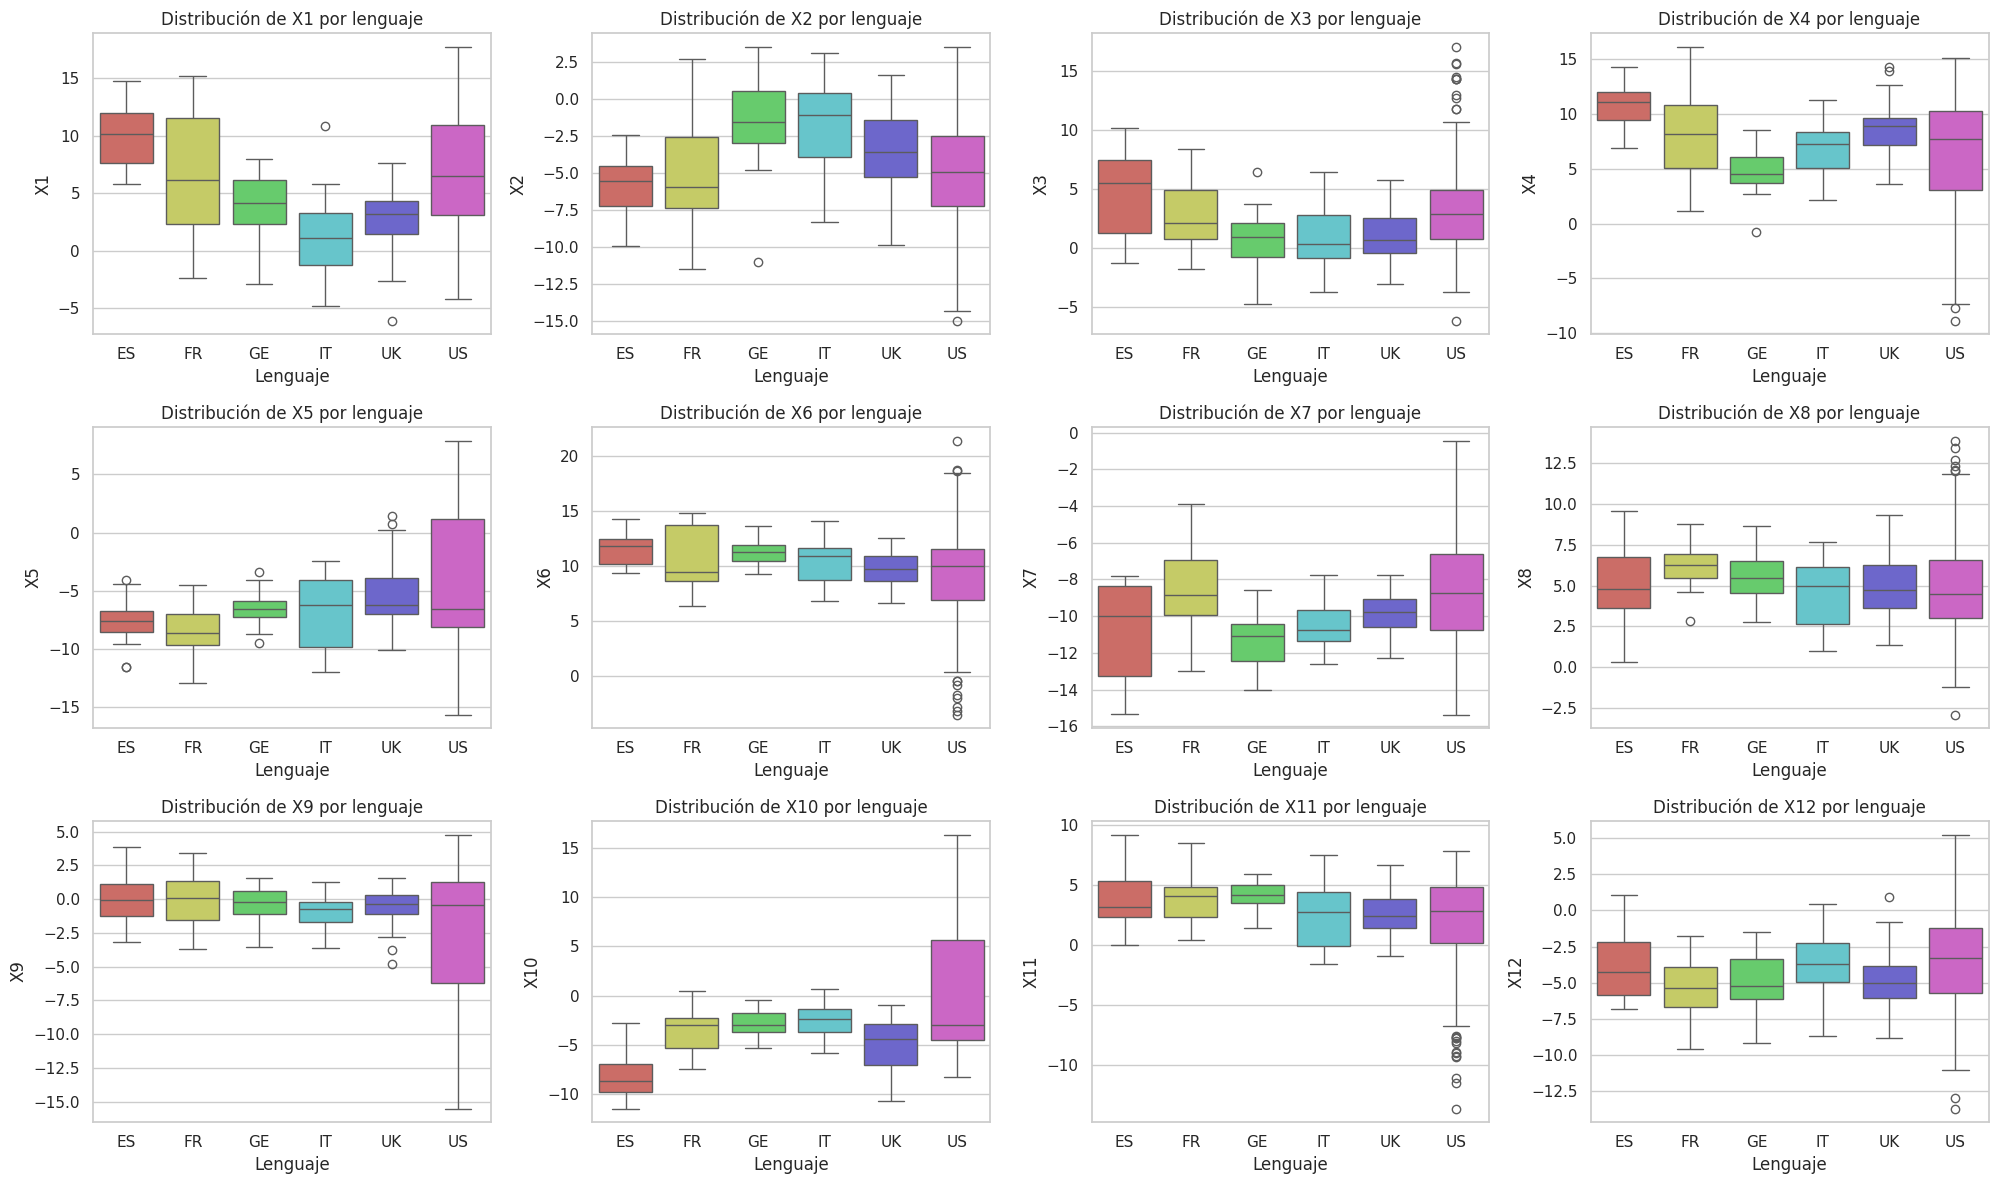

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Características a analizar
variables = [col for col in df.columns if col.startswith("X")]

sns.set(style="whitegrid")

# Crear subplots: uno por variable
n_cols = 4
n_rows = (len(variables) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 4 * n_rows))
axes = axes.flatten()

for i, var in enumerate(variables):
    sns.boxplot(data=df, x="language", y=var, ax=axes[i], palette="hls")
    axes[i].set_title(f"Distribución de {var} por lenguaje", fontsize=12)
    axes[i].set_xlabel("Lenguaje")
    axes[i].set_ylabel(var)

plt.tight_layout()
plt.show()


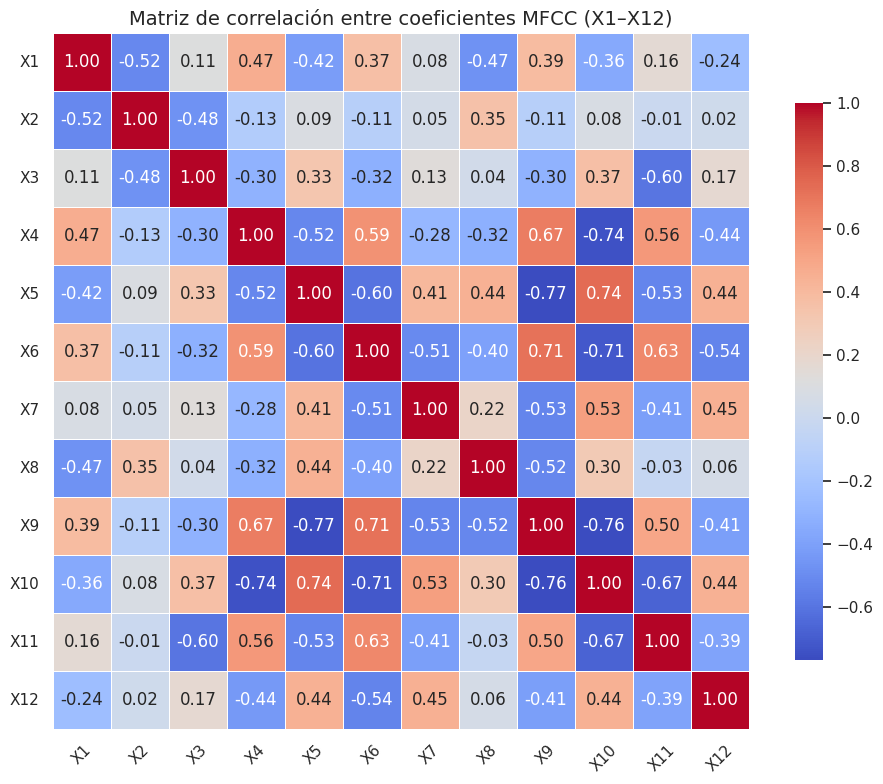

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que tu DataFrame se llama df
mfcc_columns = [f'X{i}' for i in range(1, 13)]
mfcc_data = df[mfcc_columns]

# Calcular la matriz de correlación
corr_matrix = mfcc_data.corr()

# Dibujar el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5)

plt.title("Matriz de correlación entre coeficientes MFCC (X1–X12)", fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


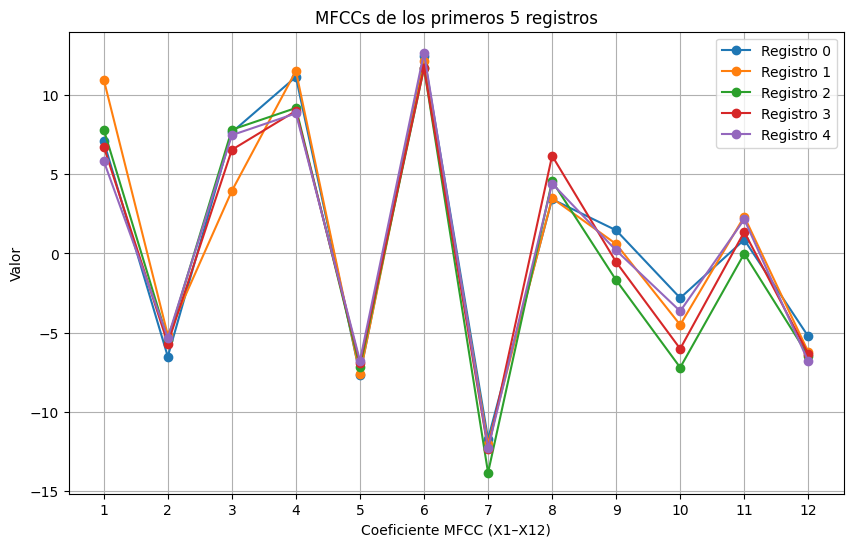

In [ ]:
# Tomar las primeras 5 filas
df_subset = df.head(5)

# Solo columnas X1 a X12
mfcc_columns = [f'X{i}' for i in range(1, 13)]
mfcc_data = df_subset[mfcc_columns].to_numpy()

# Graficar
plt.figure(figsize=(10, 6))
for i, row in enumerate(mfcc_data):
    plt.plot(range(1, 13), row, marker='o', label=f'Registro {i}')
plt.title('MFCCs de los primeros 5 registros')
plt.xlabel('Coeficiente MFCC (X1–X12)')
plt.ylabel('Valor')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()


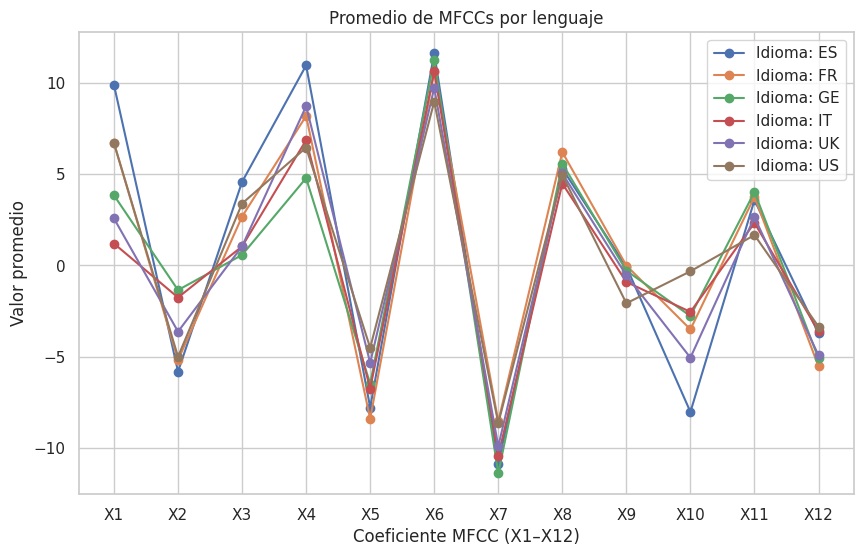

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que df ya está cargado y contiene la columna 'language' y X1–X12
mfcc_columns = [f'X{i}' for i in range(1, 13)]

# Calcular promedio por lenguaje
mean_by_language = df.groupby("language")[mfcc_columns].mean()

# Graficar
plt.figure(figsize=(10, 6))
for lang in mean_by_language.index:
    plt.plot(range(1, 13), mean_by_language.loc[lang], marker='o', label=f'Idioma: {lang}')

plt.title('Promedio de MFCCs por lenguaje')
plt.xlabel('Coeficiente MFCC (X1–X12)')
plt.ylabel('Valor promedio')
plt.xticks(range(1, 13), [f'X{i}' for i in range(1, 13)])
plt.legend()
plt.grid(True)
plt.show()


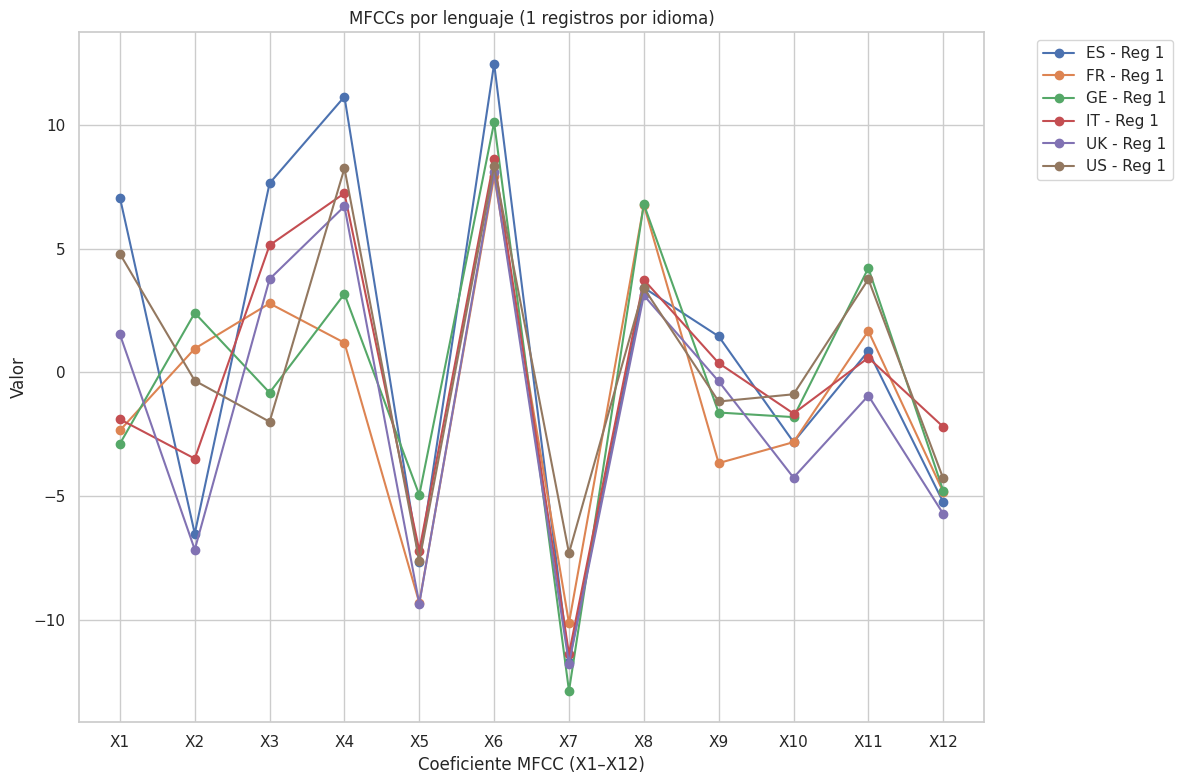

In [ ]:
plt.figure(figsize=(12, 8))

languages = df['language'].unique()
mfcc_columns = [f'X{i}' for i in range(1, 13)]

for lang in languages:
    # Tomar los primeros 5 registros por lenguaje
    subset = df[df['language'] == lang].head(1)[mfcc_columns].to_numpy()
    for i, row in enumerate(subset):
        plt.plot(range(1, 13), row, marker='o', label=f'{lang} - Reg {i+1}')

plt.title('MFCCs por lenguaje (1 registros por idioma)')
plt.xlabel('Coeficiente MFCC (X1–X12)')
plt.ylabel('Valor')
plt.xticks(range(1, 13), [f'X{i}' for i in range(1, 13)])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# Reducción de dimension

# Evaluación